In [36]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

In [37]:
root = zarr.open('trajectories4.zarr', mode='r')


(21046, 2)


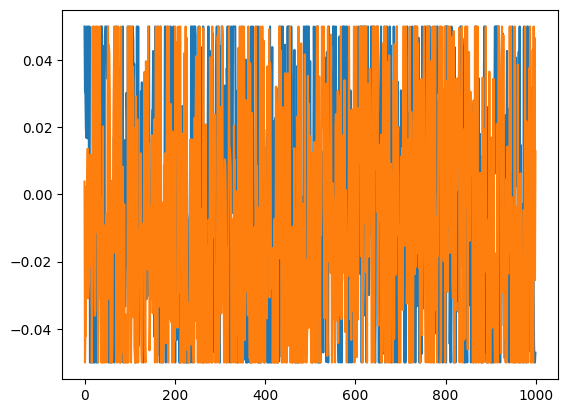

In [38]:
print(root["actions"].shape)
# plot the first 1000 actions
plt.plot(root["actions"][:1000,0])
plt.plot(root["actions"][:1000,1])
plt.show()

In [74]:
print(root["observations"].keys())

KeysView(<zarr.hierarchy.Group '/observations' read-only>)


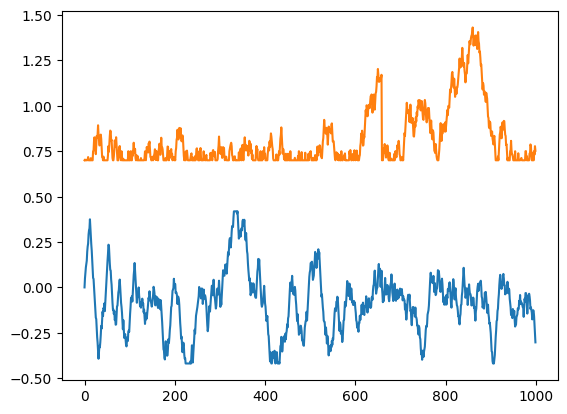

In [77]:
plt.plot(root["observations"]["previous_action"][0:1000])
plt.show()

In [39]:
root["collision"]

<zarr.core.Array '/collision' (21046,) float32 read-only>

In [40]:
np.sum(root["collision"][:])

3.0

In [41]:
# Access the model_name dataset
model_names = root['model_name'] # ['model_name']
print(model_names[0])

td_progress


In [42]:
def get_change_indices(model_names):
    change_indices = []
    current_name = model_names[0]
    for idx, name in enumerate(model_names):
        if name != current_name:
            change_indices.append(idx)
            current_name = name
    return change_indices
change_indices = get_change_indices(model_names) + [len(model_names)]

In [43]:
print(change_indices)

[10461, 21046]


In [ ]:
plt.plot(root["observations"]["previous_action"][change_indices[0]:change_indices[0]+1000])
plt.show()

In [44]:
def plot_heatmap(start_idx, end_idx):
    # Extract relevant data
    x_data = poses_x[start_idx:end_idx]
    y_data = poses_y[start_idx:end_idx]

    # Create a 2D histogram (heatmap)
    plt.hist2d(x_data, y_data, bins=(100, 100), cmap=plt.cm.jet, range=[[-5, 2.5], [-1.5, 9]])
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.title(f'Heatmap for model: {model_names[start_idx]}')
    # plt size y from 0 to 0.4
    plt.show()


In [45]:
# print the model of each change idx
print([model_names[i-1] for i in change_indices])

['td_progress', 'min_action']


In [46]:

poses_x = root['observations']['poses_x']
poses_y = root['observations']['poses_y']

In [47]:
print(root['observations']["previous_action"][90:100])

[[-0.25744237  0.69999999]
 [-0.2907698   0.69999999]
 [-0.31588049  0.69999999]
 [-0.32505457  0.69999999]
 [-0.29478206  0.69999999]
 [-0.27339501  0.69999999]
 [-0.29522322  0.69999999]
 [-0.24522322  0.74999999]
 [-0.23740615  0.69999999]
 [-0.24457247  0.69999999]]


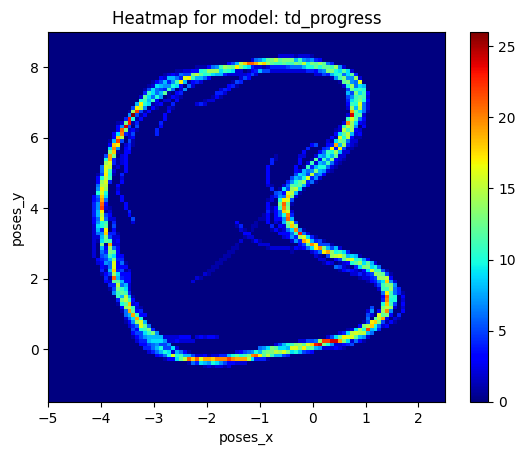

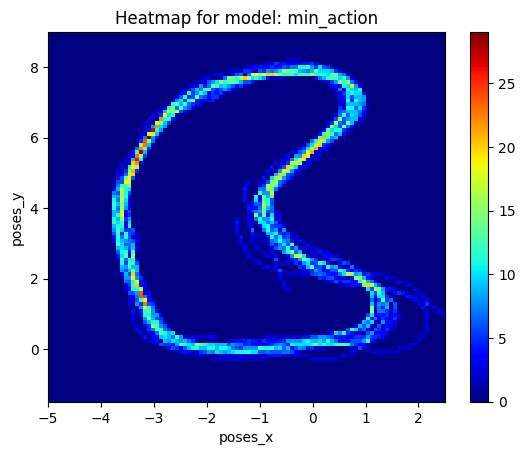

In [48]:

# Now, let's plot for each segment
start_idx = 0
for end_idx in change_indices:
    plot_heatmap(start_idx, end_idx)
    start_idx = end_idx

In [52]:
def plot_comparison_heatmap(start_idx1, end_idx1, start_idx2, end_idx2):
    # Extract relevant data for the first set
    x_data1 = poses_x[start_idx1:end_idx1]
    y_data1 = poses_y[start_idx1:end_idx1]

    # Extract relevant data for the second set
    x_data2 = poses_x[start_idx2:end_idx2]
    y_data2 = poses_y[start_idx2:end_idx2]

    # Define range and bins
    range_val = [[-5, 2.5], [-1.5, 9]]
    bins_val = (100, 100)
    
    # Create the first heatmap
    plt.hist2d(x_data1, y_data1, bins=bins_val, cmap=plt.cm.Reds, range=range_val, alpha=0.5)
    
    # Create the second heatmap overlayed on top of the first
    plt.hist2d(x_data2, y_data2, bins=bins_val, cmap=plt.cm.Blues, range=range_val, alpha=0.5)
    
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.title(f'Comparison between {model_names[start_idx1]} and {model_names[start_idx2]}')
    #plt.ylim(0, 0.4)
    plt.show()

In [53]:
print([model_names[i-1] for i in change_indices])

['td_progress', 'min_action']


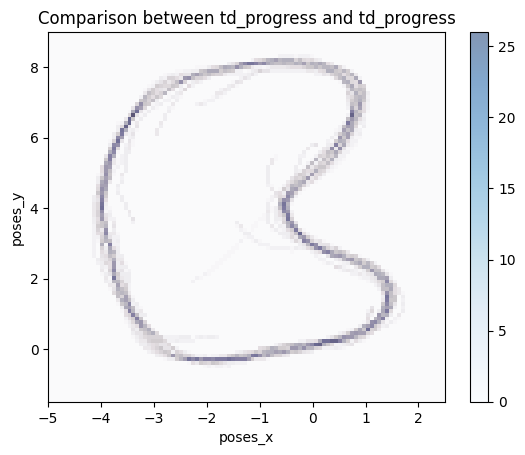

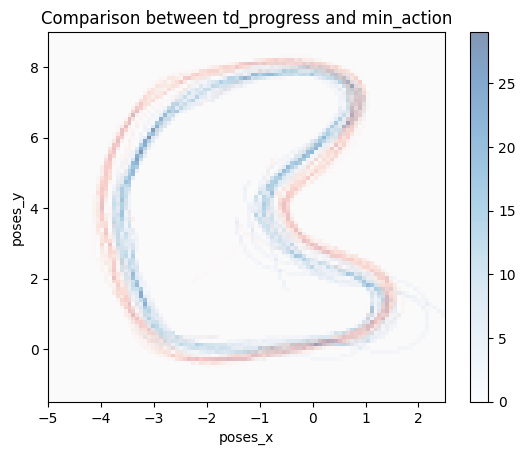

In [54]:
# Call the function
#plot_comparison_heatmap(0, change_indices[1], change_indices[1], change_indices[2])
#plot_comparison_heatmap(0, change_indices[1], change_indices[1], change_indices[2])
# compare each model with velocity
start_idx = 0
for end_idx in change_indices:
    plot_comparison_heatmap(0, change_indices[0], start_idx, end_idx)
    start_idx = end_idx

In [59]:
def plot_average_velocity_heatmap(start_idx, end_idx, poses_x, poses_y, velocities, resolution=0.001):
    # Extract relevant data
    x_data = poses_x[start_idx:end_idx]
    y_data = poses_y[start_idx:end_idx]
    vel_data = velocities[start_idx:end_idx]
    
    # Dictionary to store unique positions and their velocities
    pos_vel_map = {}
    for x, y, v in zip(x_data, y_data, vel_data):
        # Round x and y values based on resolution
        x_bin = round(x / resolution) * resolution
        y_bin = round(y / resolution) * resolution
        
        if (x_bin, y_bin) in pos_vel_map:
            pos_vel_map[(x_bin, y_bin)].append(v)
        else:
            pos_vel_map[(x_bin, y_bin)] = [v]

    # Average velocities for each position
    avg_velocities = [np.mean(v) for v in pos_vel_map.values()]
    
    #alpha
    max_occurrences = max([len(v) for v in pos_vel_map.values()])
    alpha_values = [len(v) / max_occurrences for v in pos_vel_map.values()]


    # Unpack x and y values from the keys
    x_vals, y_vals = zip(*pos_vel_map.keys())
    
    # Create scatter plot with colormap
    plt.scatter(x_vals, y_vals, c=avg_velocities, cmap=plt.cm.jet, vmax=2, alpha=alpha_values)
    plt.colorbar()
    plt.xlabel('poses_x')
    plt.ylabel('poses_y')
    plt.xlim([-5, 2.5])
    plt.ylim([-1.5, 9])
    plt.title(f'Average Velocity Heatmap {model_names[start_idx]}') 
    plt.show()

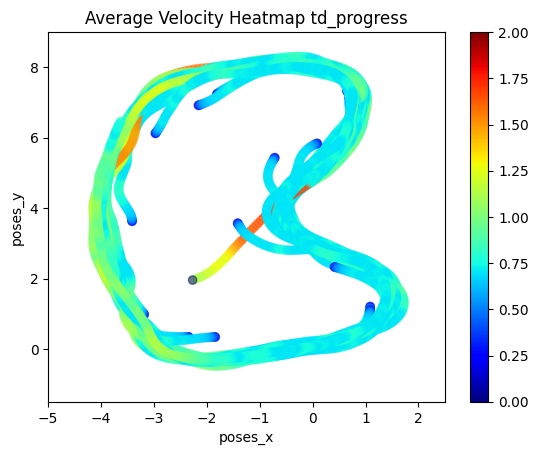

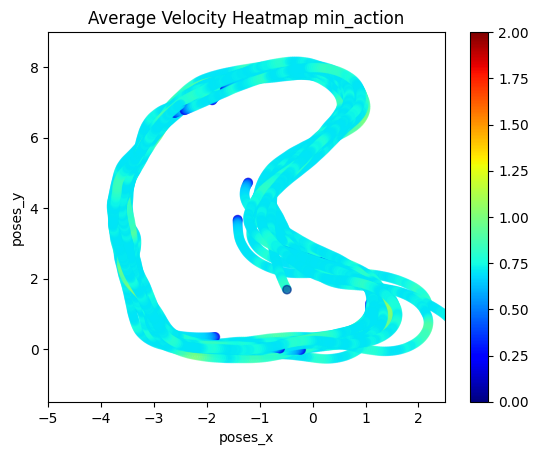

In [60]:



velocities = np.sqrt(np.array(root['observations']['linear_vels_x'])**2 + np.array(root['observations']['linear_vels_y'])**2)
start_idx = 0
for end_idx in change_indices:
    plot_average_velocity_heatmap(start_idx, end_idx, poses_x, poses_y, velocities)
    start_idx = end_idx

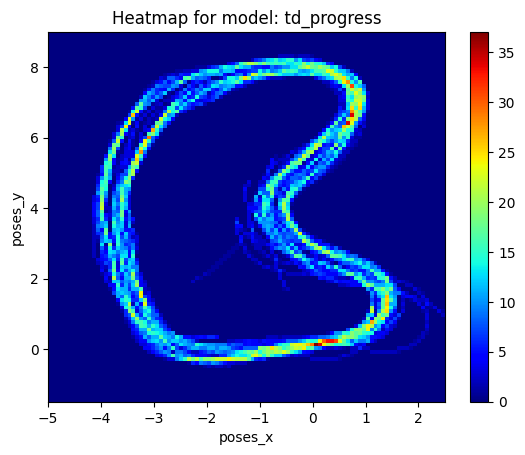

In [61]:
plot_heatmap(0, len(poses_x))

In [62]:
# number of collisions for each model
collisions = root['collision']
print("Number of collisions for each model:")
# loop over models:
start_idx = 0
for idx, change_idx in enumerate(change_indices):
    # count number of collisions for this model
    num_collisions = np.sum(collisions[start_idx:change_idx])
    print(f'{model_names[start_idx]}: {num_collisions}')
    start_idx = change_idx


Number of collisions for each model:
td_progress: 1.0
min_action: 2.0


In [63]:
# for each model give the mean velocity
# print(root['observations'].getkeys())

print("Mean normalized velocity for each model:")
# loop over models:
start_idx = 0
for idx, change_idx in enumerate(change_indices):
    # count number of collisions for this model
    mean_velocity = np.mean(velocities[start_idx:change_idx])
    print(f'{model_names[start_idx]}: {mean_velocity} +- {np.std(velocities[start_idx:change_idx])}')
    start_idx = change_idx

Mean normalized velocity for each model:
td_progress: 0.7977498769760132 +- 0.16636452078819275
min_action: 0.7246463894844055 +- 0.06145302951335907


In [64]:
print(change_indices)

[10461, 21046]


td_progress
min_action


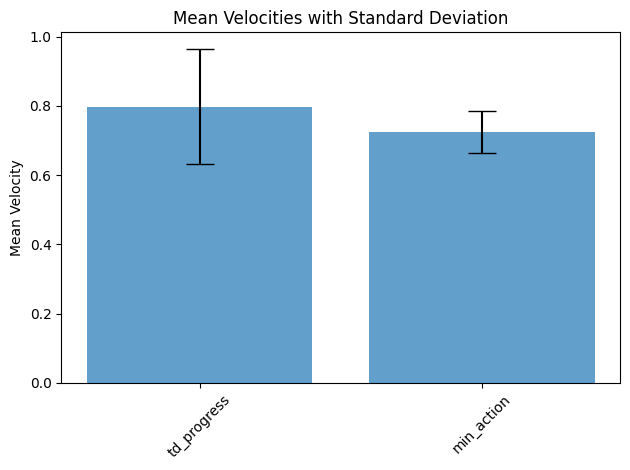

In [65]:

means = []
stds = []

start_idx = 0
model_names_ = []
for idx, change_idx in enumerate(change_indices):
    mean_velocity = np.mean(velocities[start_idx:change_idx])
    std_velocity = np.std(velocities[start_idx:change_idx])
    means.append(mean_velocity)
    stds.append(std_velocity)
    model_names_.append(model_names[start_idx])
    print(model_names[start_idx])
    start_idx = change_idx


# Plotting
plt.bar(model_names_, means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.ylabel('Mean Velocity')
plt.title('Mean Velocities with Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [66]:
# for each model the number of ored dones and truncates
print("Number of ores done and truncates for each model:")
done = root['done']
truncated = root['truncated']
done_or_truncated = np.logical_or(done, truncated)
start_idx = 0
print("Discounted TD Reward")
for idx, change_idx in enumerate(change_indices):
    # count number of collisions for this model
    num_done_or_truncated = np.sum(done_or_truncated[start_idx:change_idx])
    print(f'{model_names[start_idx]}: {num_done_or_truncated}')
    start_idx = change_idx

Number of ores done and truncates for each model:
Discounted TD Reward
td_progress: 17
min_action: 17


In [67]:
def calculate_discounted_reward(rewards, done, truncated, gamma=0.99):
    # combine done and truncated
    done_or_truncated = np.logical_or(done, truncated)
    # split into segments at done or truncated
    change_indices = np.where(done_or_truncated)[0] + 1 # catch the last segment
    # ensure that we dont access out of bounds, by checking if we are at the end
    change_indices[-1] = min(change_indices[-1], len(rewards)-1)
    # calculate discounted reward for each segment
    start_idx = 0
    discounted_rewards = []
    for end_idx in change_indices:
        segment_rewards = rewards[start_idx:end_idx]
        discounted_reward = np.sum(segment_rewards * gamma ** np.arange(len(segment_rewards)))
        # print(f'Discounted reward: {discounted_reward}')
        discounted_rewards.append(discounted_reward)
        start_idx = end_idx
    return np.mean(discounted_rewards), np.std(discounted_rewards)

In [68]:
# for each model calculate the mean discounted reward
start_idx = 0
print("Discounted TD Reward")
for idx, change_idx in enumerate(change_indices): # this is for each model
    # count number of collisions for this model
    mean_discounted_reward, std_discounted = calculate_discounted_reward(root['rewards'][start_idx:change_idx],
                                root['done'][start_idx:change_idx],
                                root['truncated'][start_idx:change_idx])
    print(f'{model_names[start_idx]}: {mean_discounted_reward} +- {std_discounted}')
    start_idx = change_idx
    

Discounted TD Reward
td_progress: 15.2836159088376 +- 1.1861247653685727
min_action: 14.330538394330523 +- 0.8490332018631117


In [69]:
# print the numbers of dones 
print("Number of dones:", np.sum(root['done']))
print("Number of truncated:", np.sum(root['truncated']))


Number of dones: 34
Number of truncated: 31


In [70]:
# print distance between truncated being true
truncated = root['truncated']
truncated_indices = np.where(np.array(root['truncated']) == True)[0]

In [71]:
# print diff truncated indices
print("Diff truncated indices:", np.diff(truncated_indices))

Diff truncated indices: [ 597  646  667  603  625  566 1035  652  639  615  645  629  642  622
  619  678  650  639  645 1178  674  650  632  633  641  687  656  647
  902  673]


In [1]:
import zarr

In [3]:
import numpy as np
import pickle as pkl
import os

In [12]:
with open(os.path.join("datasets", "progress"), 'rb') as f:
    all_timesteps = []
    rewards = []
    while True:
        # action, obs, reward, done, truncated, info, timesteps, model_name 
        try:
            timestep = pkl.load(f)
            all_timesteps.append(timestep)
            rewards.append(timestep[2])
        except EOFError:
            break

In [11]:
print(len(all_timesteps))

97493


In [13]:
numpy_rewards = np.array(rewards)

In [14]:
root = zarr.open('test.zarr', mode='w')

In [15]:
root['rewards'] = numpy_rewards